1. Reproduce pop1 and pop2 populations and samples using NumPy binomial fxn
    - with n=10, size=10,000
    - p value pop1=0.2, pop2=0.5
2. Using sample size=100, calculate means and std dev of samples


First, what do you expect to happen in below scenarios (prior to coding)?
1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?
    - I anticipate the means to stay relatively the same, though the standard deviations may become tighter as sample size increases, and become more susceptible to noise as the size decreases. The p value will decrease with the larger sample set

2. Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?
    - as the p value of pop1/group1 nears that of pop2/group2, the confidence that there are significant differences (p-value) will decrease as it will be harder to notice smaller changes

3. Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?
    - No, a different distribution means the data points are going to be grouped/scattered/aligned in a different manner. Perhaps by chance the sample mean or standard deviation could be similar, but likely not both.


Now compute:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

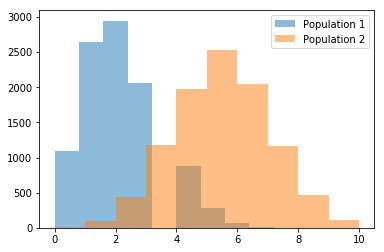

In [2]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

# make a histogram for the 2 groups
plt.hist(pop1, alpha=0.5, label='Population 1')
plt.hist(pop2, alpha=0.5, label='Population 2')
plt.legend(loc='upper right')
plt.show()

In [3]:
# taking group samples
group1 = np.random.choice(pop1, 100, replace=True)
group2 = np.random.choice(pop2, 100, replace=True)

In [4]:
# with a group sample size of 100
print(group1.mean())
print(group2.mean())
print(group1.std())
print(group2.std())

2.04
5.19
1.1993331480451959
1.5980926130859876


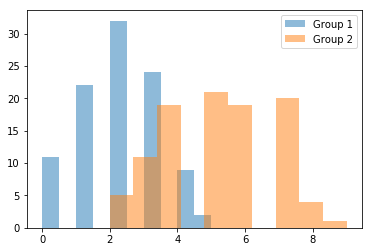

In [5]:
# make a histogram for the 2 groups
plt.hist(group1, alpha=0.5, label='Group 1')
plt.hist(group2, alpha=0.5, label='Group 2')
plt.legend(loc='upper right')
plt.show()

In [6]:
# t-statistic and pvalue for sample size = 100
print(ttest_ind(group2, group1, equal_var=False))

Ttest_indResult(statistic=15.686157333741921, pvalue=9.728627461459917e-36)


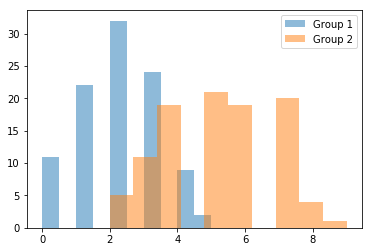

In [7]:
plt.hist(group1, alpha=0.5, label='Group 1')
plt.hist(group2, alpha=0.5, label='Group 2')
plt.legend(loc='upper right')
plt.show()

Interestingly, group 2 mean is over 2x as large, despite relatively similar standard deviation

The graph seems to take on a similar overall appearance as the population values, although with more gaps/spacing

-----

In [8]:
# increasing group samples
group1 = np.random.choice(pop1, 1000, replace=True)
group2 = np.random.choice(pop2, 1000, replace=True)

In [9]:
# with a group sample size of 1000
print(group1.mean())
print(group2.mean())
print(group1.std())
print(group2.std())

2.004
5.046
1.2664848992388342
1.541390281531579


In [10]:
# t-statistic and pvalue for sample size = 1000
print(ttest_ind(group2, group1, equal_var=False))

Ttest_indResult(statistic=48.195625356681745, pvalue=0.0)


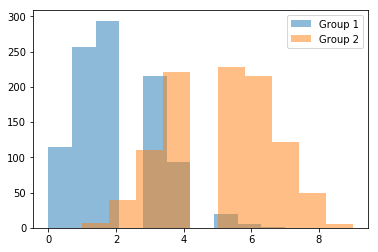

In [11]:
plt.hist(group1, alpha=0.5, label='Group 1')
plt.hist(group2, alpha=0.5, label='Group 2')
plt.legend(loc='upper right')
plt.show()

The difference in standard deviation has gotten even smaller, while that of the mean has increased. Above, the histogram takes on a similar overall appearance of the population plot, not minding the gaps

------

In [12]:
# decreasing group samples
group1 = np.random.choice(pop1, 20, replace=True)
group2 = np.random.choice(pop2, 20, replace=True)

In [13]:
# with a group sample size of 20
print(group1.mean())
print(group2.mean())
print(group1.std())
print(group2.std())

2.25
4.75
1.3738631664034087
1.6393596310755


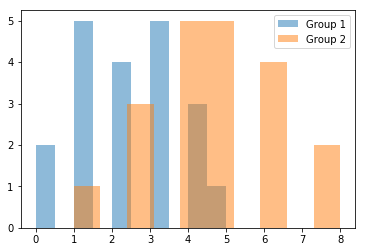

In [14]:
plt.hist(group1, alpha=0.5, label='Group 1')
plt.hist(group2, alpha=0.5, label='Group 2')
plt.legend(loc='upper right')
plt.show()

In [15]:
# t-statistic and pvalue for sample size = 20
print(ttest_ind(group2, group1, equal_var=False))

Ttest_indResult(statistic=5.094731018709964, pvalue=1.061039961612266e-05)


It would be hard to roughly determine the true population histogram with a sample size of 20. The data has enough gaps in between that there is no clear shape of the data distribution. Despite how much I'd distrust this data, the pvalue is at nearly zero. I anticipated it'd be worse.

-----

In [16]:
# change p of pop1 = 0.3, take new samples and compute t stat and p value
# p here is probability, not p-value
pop1 = np.random.binomial(10, 0.3, 10000)

# new samples
group1 = np.random.choice(pop1, 100, replace=True)
group2 = np.random.choice(pop2, 100, replace=True)

# t-statistic and pvalue
print(ttest_ind(group2, group1, equal_var=False))

Ttest_indResult(statistic=9.996244354044709, pvalue=3.035794775459309e-19)


The t-value has decreased by half in increasing the p in population 1. P-value has decreased, though I expected it to increase.

In [18]:
# change the p of pop1 = 0.4, 
pop1 = np.random.binomial(10, 0.4, 10000)
# take new samples and compute t stat and p value

group1 = np.random.choice(pop1, 100, replace=True)

# t-statistic and pvalue
print(ttest_ind(group2, group1, equal_var=False))

Ttest_indResult(statistic=4.0320551388964745, pvalue=7.893840918635678e-05)


The t-value continues to decrease and the p-value increases as the populations become more similar because it becomes more difficult to find meaningful differences.

In [19]:
pop1 = np.random.normal(10, 0.2, 10000)
pop2 = np.random.normal(10, 0.5, 10000)

print(pop1.mean())
print(pop2.mean())
print(pop1.std())
print(pop2.std())

10.001765509469488
9.996006933771083
0.19992988576044543
0.499861915483341
